In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable 

# **Eejercicio 1.**
Resuelva la Ecuación del calor, usando el método anterior para el siguiente caso:\
**Caso a)**\
Una barra metálica de longitud $L=10$, y coeficiente de difusión $k=100$. Condición inicial (Temperatura dentro de la barra): $u(x,0)=0$.\
Condiciones a la frontera: $u(0,t)=10$, $u(L,t)=0$.\
Realice los cálculos hasta alcanzar el equilibrio térmico.

dt/dx^2 < 0.5 0.004514757378689345


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: The following kwargs were not used by contour: 'lw'


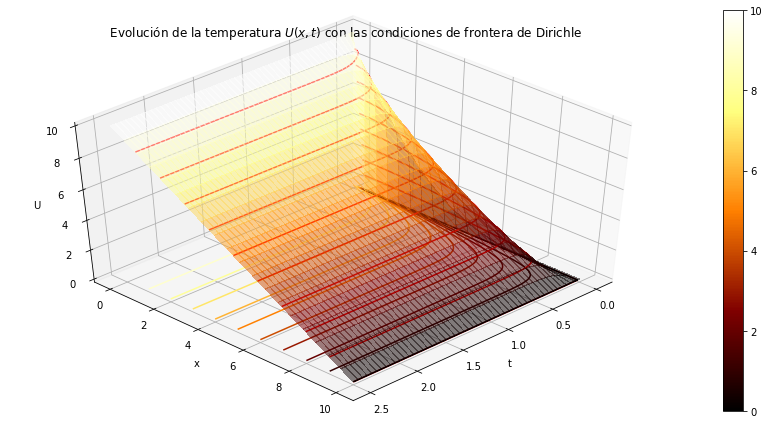

In [3]:
#Puntos en el eje X.
X = 20 
#Puntos en el tiempo.
T = 2000
x0 = 0
#Longitud de la barra.
xL = 10
t0 = 0 
#Tiempo final
tF = 2.5
#Tamaño discretización en x.
dx = ( xL - x0 )/( X - 1 )
#Tamaño de la discretización en t.
dt = ( tF - t0 )/( T - 1 )

print( "dt/dx^2 < 0.5", dt/dx**2 )

#Difusividad térmica
k = 100.0
#Coeficiente en la ecuación
alpha = k*dt/dx**2
#Malla (x,t)
xstep = np.linspace( x0, xL, X )
tstep = np.linspace( t0, tF, T )
#Tamaño de la matriz,la solución y la inicia con ceros
U = np.zeros( ( X,T ) )
#Función de temperatura interior del tubo, donciciones
#de frontera de Dirichle
U[:,0] = 0
U[ 0, : ] = 10
U[ -1, : ] = 0
#Método de diferencias finitas Ec. del calor.
#Teimpo.
for j in range( 0, T - 1 ):
#Tiempo en dominio x.
   for i in range( 1, X - 1 ):
     U[ i, j+1 ] = alpha*U[ i - 1, j ] + (1 - 2*alpha )*U[ i, j ] + alpha*U[ i + 1, j ]

#Se define una malla para graficar.
Temp, Xray = np.meshgrid( tstep, xstep )
fig = plt.figure( figsize = ( 12, 6 ) )
#Gráficamos una superficie.
ax = fig.gca( projection = "3d" )
surf = ax.plot_surface( Temp, Xray, U, cmap = "afmhot",
                       linewidth = 0.01, antialiased = False, alpha = 0.5)
#Contornos
ax.contour( Temp, Xray, U, 10, lw = 1, colors = "r", linestyles = "solid")
ax.contour( Temp, Xray, U, 10, lw = 1, cmap = "afmhot", linestyles = "solid", offset = 0 )
#Gráfica una tabla de valores.
m = cm.ScalarMappable( cmap = "afmhot" )
m.set_array( U )
plt.colorbar( m )
#Etiquetas de los ejes.
ax.set_xlabel( "t" )
ax.set_ylabel( "x" )
ax.set_zlabel( "U" )
ax.set_title (" Evolución de la temperatura $U(x,t)$ con las condiciones de frontera de Dirichle")
#Observador
ax.view_init( elev = 45, azim = 45 )
plt.tight_layout()
plt.show()



**Caso b)**\
Un material de longitud $L=10$ con coeficiente de difusión térmica $k=0.25$\
Condición inicial $u(x,0)=20$\
Condiciones a la frontera: $u(0,t)=(20+10sin(\pi t/12), u(L,t) = 20$\
Realice los cálculos para $t = (0.48)$

Pueden ajustar los parámetros para ver cómo cambia la temperatura dentro del cuerpo.

dt/dx^2 < 0.5? 0.01155277018467898


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: UserWarning: The following kwargs were not used by contour: 'lw'


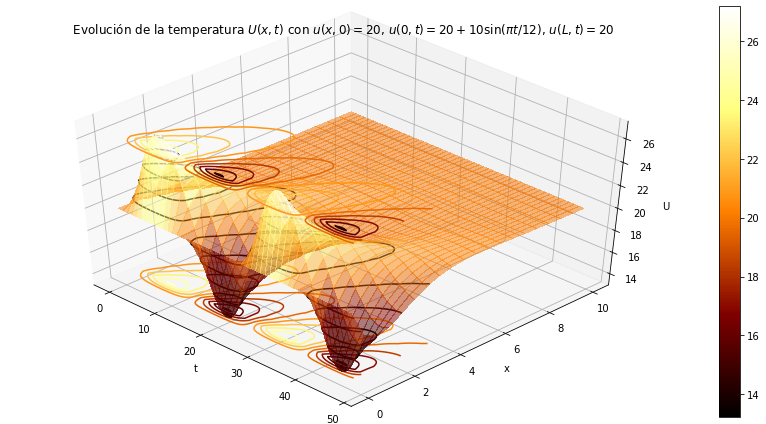

In [9]:
#Puntos en el eje X.
X = 20 
#Puntos en el tiempo.
T = 15000
x0 = 0
#Longitud de la barra.
xL = 10
t0 = 0 
#Tiempo final
tF = 48
#Tamaño discretización en x.
dx = ( xL - x0 )/( X - 1 )
#Tamaño de la discretización en t.
dt = ( tF - t0 )/( T - 1 )

print( "dt/dx^2 < 0.5?", dt/dx**2 )

#Difusividad térmica
k = 0.25
#Coeficiente en la ecuación
alpha = k*dt/dx**2
#Malla (x,t)
xstep = np.linspace( x0, xL, X )
tstep = np.linspace( t0, tF, T )
#Tamaño de la matriz,la solución y la inicia con ceros
U = np.zeros( ( X,T ) )
#Función de temperatura interior del tubo, donciciones
#de frontera de Dirichle
U[:,0] = 20.0
#Método de diferencias finitas Ec. del calor.
#Teimpo.
for j in range( 0, T - 1 ):
    t = j*dt
#Condiciones de frontera.
    U[ 0, : ] = 20 + 10*np.sin(np.pi*t/12.0)
    U[ -1, :] = 20.0
#Tiempo en dominio x.
    for i in range( 1, X - 1 ):
        U[ i, j+1 ] = alpha*U[ i - 1, j ] + (1 - 2*alpha )*U[ i, j ] + alpha*U[ i + 1, j ]

#Se define una malla para graficar.
Temp, Xray = np.meshgrid( tstep, xstep )
fig = plt.figure( figsize = ( 12, 6 ) )
#Gráficamos una superficie.
ax = fig.gca( projection = "3d" )
surf = ax.plot_surface( Temp, Xray, U, cmap = "afmhot",
                       linewidth = 0.01, antialiased = False, alpha = 0.5)
#Contornos
ax.contour( Temp, Xray, U, 10, lw = 1, colors = "k", linestyles = "solid")
ax.contour( Temp, Xray, U, 10, lw = 1, cmap = "afmhot", linestyles = "solid", offset = 26 )
ax.contour( Temp, Xray, U, 10, lw = 1, cmap = "afmhot", linestyles = "solid", offset = 14 )
#Gráfica una tabla de valores.
m = cm.ScalarMappable( cmap = "afmhot" )
m.set_array( U )
plt.colorbar( m )
#Etiquetas de los ejes.
ax.set_xlabel( "t" )
ax.set_ylabel( "x" )
ax.set_zlabel( "U" )
ax.set_title (" Evolución de la temperatura $U(x,t)$ con $u(x,0)=20$, $u(0,t)=20+10\sin(\pi t/12)$, $u(L,t)=20$")
#Observador
ax.view_init( elev = 45, azim = -45 )
plt.tight_layout()
plt.show()

# **Ejercicio 2**
**Variaciones de la temperatura en el suelo**\

La superficie de la tierra recibe radiación solar durante el día. Esta energía la transforma en calor, y la cambia la temperatura dentro del suelo. Por la noche al no recibir radiación solar la emite a la atmósfera.

Si suponemos que la temperatura del suelo varía con la profundidad, podemos suponer que tenemos un problema unidimensional siendo el eje $x$ la dirección hacia dentro del suelo.

A cierta profundidad $x = L$, suponemos que la temperatura ya no cambia, es decir $\partial u/ \partial x = 0$ (Condición de Neumann).

Supondremos que la variación de la temperatura en la superficie terrestre que varía como

$u(0,t) = u_0 + u_a Sin(2\pi t /P)$

donde $U_0$ es la inicial temperatura promedio del suelo y $u_a$ es la temperatura del aire. La constante $P$ es el periodo de variación diaria de temperatura $P = 24h = 86.400s$.

En este caso la constante de difusión de calor es $k = 1.0x10^-6$. El tiempo será medido en segundos.

Usando la Ecuación de Calor, determina numéricamente la variación del perfil de temperatura dentro del suelo, por ejemplo para Hermosillo en estos días supongamos que $u_0 = 15oC, u_0 = 20oC$.

Realiza una simulación de al menos 48 horas.



dt/dx^2 < 0.5? 3457.4400000000005


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning: The following kwargs were not used by contour: 'lw'


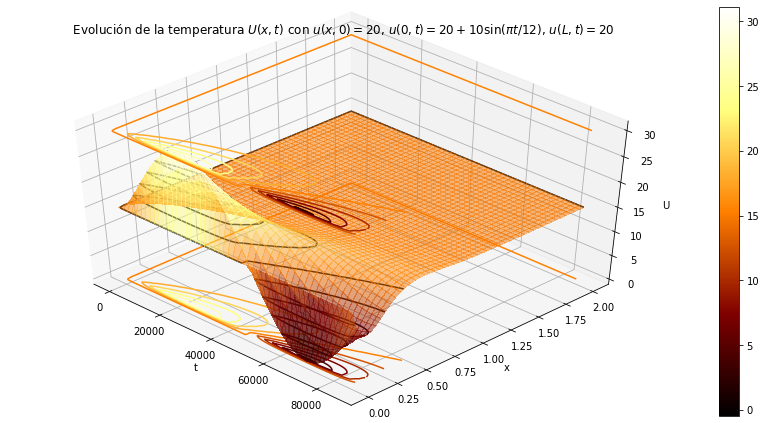

In [14]:
#Puntos en el eje X.
X = 50 
#Puntos en el tiempo.
T = 15001
x0 = 0
#Longitud de la barra.
xL = 2
t0 = 0 
#Tiempo final
tF = 86400
#Tamaño discretización en x.
dx = ( xL - x0 )/( X - 1 )
#Tamaño de la discretización en t.
dt = ( tF - t0 )/( T - 1 )

print( "dt/dx^2 < 0.5?", dt/dx**2 )

#Difusividad térmica
k = 1*10**(-6)
#Coeficiente en la ecuación
alpha = k*dt/dx**2
#Malla (x,t)
xsteps = np.linspace( x0, xL, X )
tstep = np.linspace( t0, tF, T )
#Tamaño de la matriz,la solución y la inicia con ceros
U = np.zeros( ( X,T ) )
#TempI 20°C dentro de la tierra.
U[:,0] = 15*np.ones(xsteps.shape)
#Método de diferencias finitas Ec. del calor.
#Teimpo.
for j in range( 0, T - 1 ):
    t = j*dt
#Condiciones de frontera.
    U[ 0, : ] = 15 + 20.0*np.sin(2*np.pi*t/tF)
    U[ -1, :] = 15
#Tiempo en dominio x.
    for i in range( 1, X - 1 ):
        U[ i, j+1 ] = alpha*U[ i - 1, j ] + (1 - 2*alpha )*U[ i, j ] + alpha*U[ i + 1, j ]

#Se define una malla para graficar.
Temp, Xray = np.meshgrid( tstep, xsteps )
fig = plt.figure( figsize = ( 12, 6 ) )
#Gráficamos una superficie.
ax = fig.gca( projection = "3d" )
surf = ax.plot_surface( Temp, Xray, U, cmap = "afmhot",
                       linewidth = 0.01, antialiased = False, alpha = 0.5)
#Contornos
ax.contour( Temp, Xray, U, 10, lw = 1, colors = "k", linestyles = "solid")
ax.contour( Temp, Xray, U, 10, lw = 1, cmap = "afmhot", linestyles = "solid", offset = 0 )
ax.contour( Temp, Xray, U, 10, lw = 1, cmap = "afmhot", linestyles = "solid", offset = 30 )
#Gráfica una tabla de valores.
m = cm.ScalarMappable( cmap = "afmhot" )
m.set_array( U )
plt.colorbar( m )
#Etiquetas de los ejes.
ax.set_xlabel( "t" )
ax.set_ylabel( "x" )
ax.set_zlabel( "U" )
ax.set_title (" Evolución de la temperatura $U(x,t)$ con $u(x,0)=20$, $u(0,t)=20+10\sin(\pi t/12)$, $u(L,t)=20$")
#Observador
ax.view_init( elev = 45, azim = -45 )
plt.tight_layout()
plt.show()